# Waffle charts 

## ... or never ever use pie charts 

Pie charts are the devil. They are an instant F in this class. I'll give you an example of why. 

What's the racial breakdown of journalism majors at UNL?

Here it is in a pie chart: 

In [3]:
library(dplyr)
library(ggplot2)

enrollment <- read.csv("../../Data/collegeenrollment.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



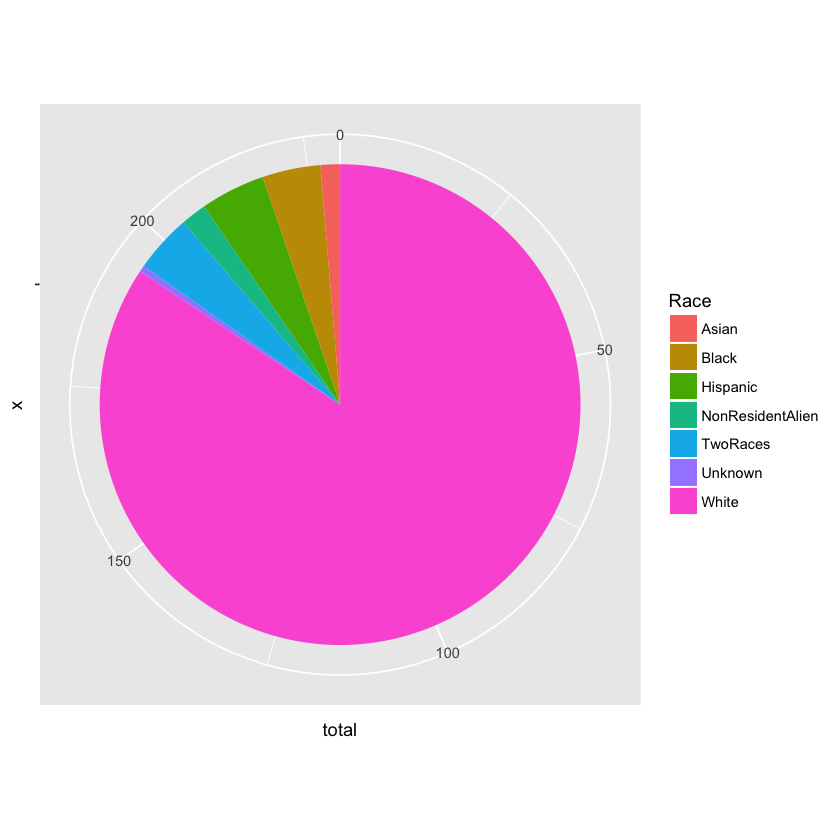

In [4]:
jour <- filter(enrollment, MajorName == "Journalism")

jdf <- jour %>% 
group_by(Race) %>%
summarize(
       total=sum(Count)) %>%
select(Race, total) %>% 
filter(total != 0)

ggplot(jdf, aes(x="", y=total, fill=Race)) + geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0)

You can see, it's pretty white. But ... what about beyond that? How carefully can you evaluate angles and area? 

Not well. 

So let's introduce a better way: The Waffle Chart. Some call it a square pie chart. I personally hate that. Waffles it is. 

In [5]:
# install.packages('waffle')

library(waffle)

The downside of the waffle library -- it doesn't play well with arbitrary dataframes. The good news? You don't want to be doing too many categories, so it's easy the create vectors to handle this. 

In [6]:
jour %>% 
group_by(Race) %>%
summarize(
       total=sum(Count)) %>%
select(Race, total) %>% 
filter(total != 0)

Race,total
Asian,3
Black,9
Hispanic,10
NonResidentAlien,4
TwoRaces,9
Unknown,1
White,194


So that's the data we need to create a vector for. Here's what that looks like:

In [7]:
j <- c('Asian'=3, 'Black'=9, 'Hispanic'=10, 'NonResidentAlien'=4, 'Two or more races'=9, "Unknown"=1, "White"=194)

Now we can put into the waffle library. The element j is our data, the number of rows you can change if you want, `title` and `xlab` are straight out of ggplot. 

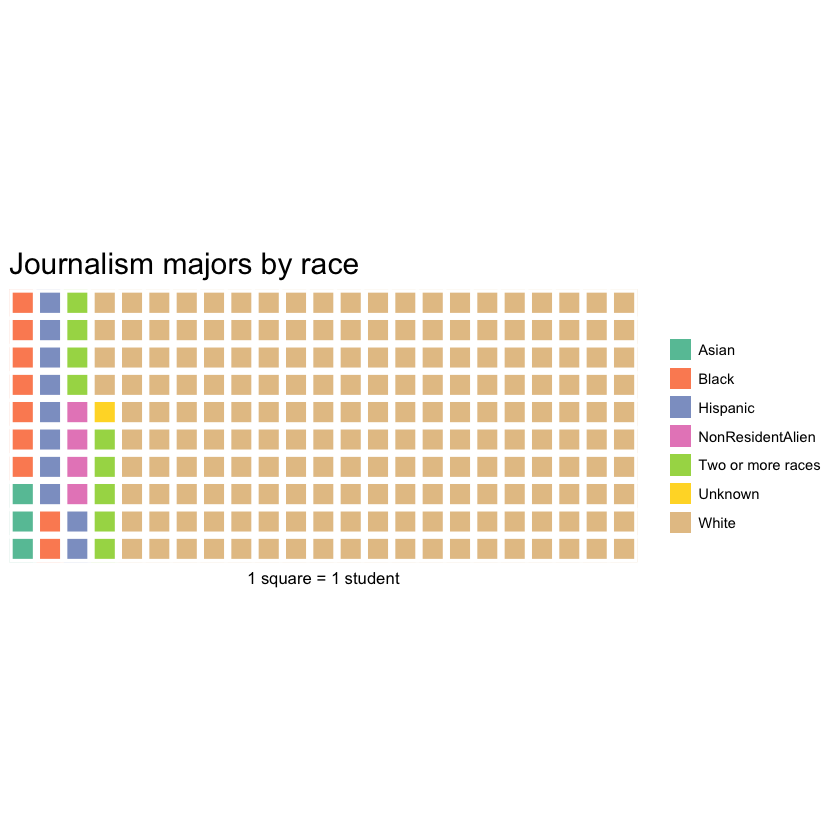

In [9]:
waffle(j, rows = 10, title="Journalism majors by race", xlab="1 square = 1 student")

How does this compare with the pie chart? Is it easier to read? Does it tell a different story? 

### By gender, specifying colors in the most basic way possible

In [12]:
jour %>% 
group_by(Gender) %>%
summarize(
       total=sum(Count)) %>%
select(Gender, total) 

Gender,total
Female,141
Male,89


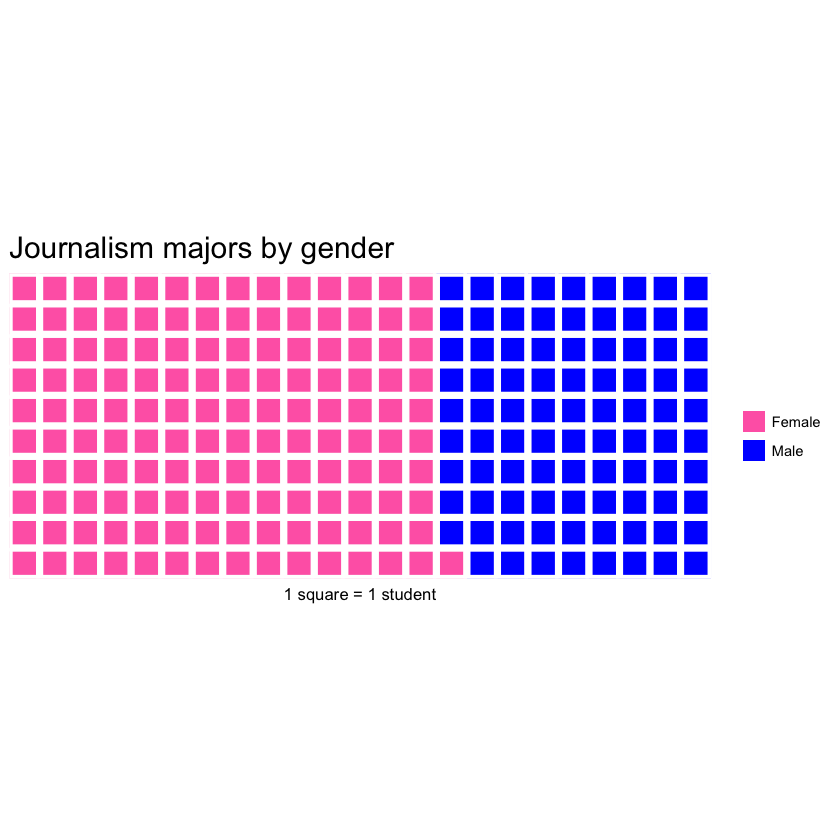

In [13]:
g <- c('Female'=141, 'Male'=89)

waffle(g, rows = 10, title="Journalism majors by gender", xlab="1 square = 1 student", colors=c("#ff69b4", "#0000ff"))

### Comparing different datasets

To compare different datasets in sequential waffle charts, you create an iron (get it?) to put them together. Here, we'll compare the percentage of business administration majors who are male to the percentage of advertising majors who are male. First, let's get the stats.

In [30]:
ba <- filter(enrollment, MajorName == "Business Administration")

ba %>% 
group_by(Gender) %>%
summarize(
       total=sum(Count)) %>%
select(Gender, total) 

ad <- filter(enrollment, MajorName == "Advertising & Public Relations")

ad %>% 
group_by(Gender) %>%
summarize(
       total=sum(Count)) %>%
select(Gender, total) 


Gender,total
Female,304
Male,634


Gender,total
Female,407
Male,210


Going old school, I calculated the percentages by hand, then added them to a vector where each waffle chart is expecting them. I then added a table to make it clearer to readers.

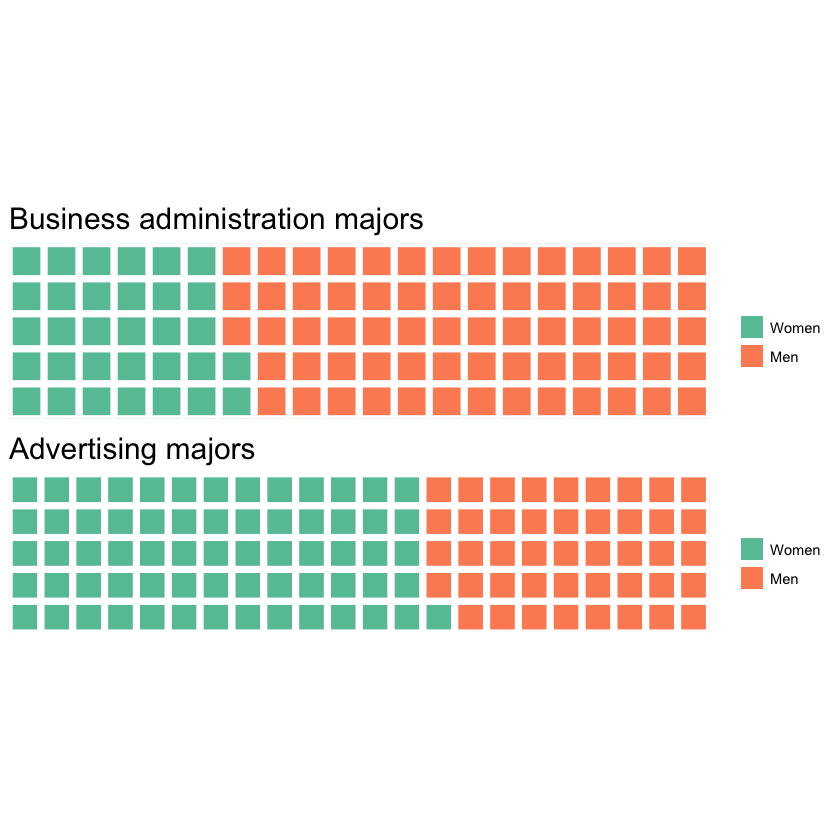

In [31]:
iron(
  waffle(c(Women = 32, Men = 68), rows = 5, title = "Business administration majors"),
  waffle(c(Women = 66, Men = 44), rows = 5, title = "Advertising majors")
)